<a href="https://colab.research.google.com/github/Joao-vitor1/training-CNNs/blob/main/Prova_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
batch_size = 128
h = {
    'VAL_PERC': 0.1,
    'LR': 0.001,
    'BETA1' : 0.9,
    'BETA2' : 0.999,
    'EPSILON' : 1.0e-8,
    'NUM_EPOCHS': 30,
    'BATCH_SIZE': 32,
    'DECAY': 0.0
}

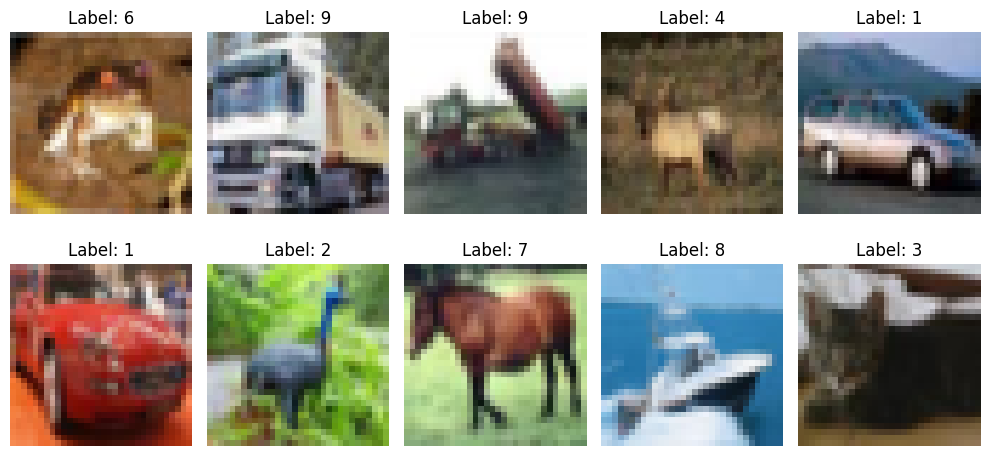

In [ ]:
# Display some images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.set_title(f'Label: {y_train[i][0]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(X_train)

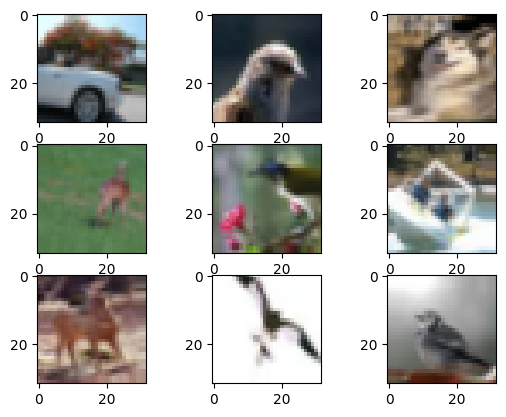

In [ ]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [ ]:
#
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize data
X_train_normalized = keras.utils.normalize(X_train, axis=1)
X_test_normalized = keras.utils.normalize(X_test, axis=1)

# mean=np.mean(X_train)
# std=np.std(X_train)
# X_test_normalized=(X_test-mean)/std
# X_train_normalized=(X_train-mean)/std

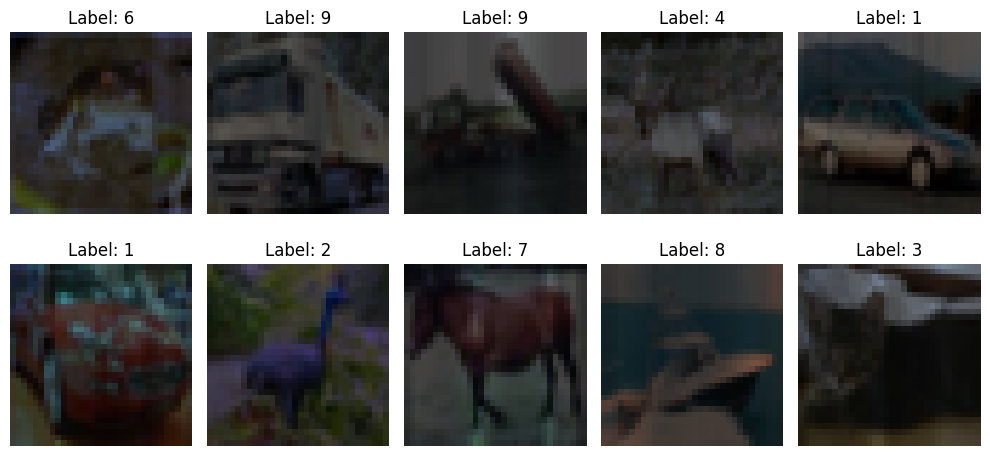

In [ ]:
# Display some images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train_normalized[i])
    ax.set_title(f'Label: {y_train[i][0]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
X_train.shape, X_train_normalized.shape

((50000, 32, 32, 3), (50000, 32, 32, 3))

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [ ]:
model = models.Sequential(
    [
        keras.Input(shape=(32,32,3)),
        layers.Conv2D(32, kernel_size=(3,3), activation = 'relu'), #30x30x32
        layers.BatchNormalization(axis=-1),
        layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'), #28x28x64
        layers.BatchNormalization(axis=-1),
        layers.MaxPooling2D(pool_size=(2,2)), #14x14x64
        layers.Dropout(0.3),
        layers.Conv2D(128, kernel_size=(3,3), activation = 'relu'),  #12x12x128
        layers.BatchNormalization(axis=-1),
        layers.MaxPooling2D(pool_size=(2,2)),  #6x6x128
        layers.Conv2D(128, kernel_size=(3,3), activation = 'relu'), #4x4x128
        layers.BatchNormalization(axis=-1),
        layers.MaxPooling2D(pool_size=(2,2)), #2x2x128
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(axis=-1),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ]
    )
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_86 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_61 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_62 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 512,074 (1.95 MB)

 Trainable params: 510,346 (1.95 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [ ]:
opt = optimizers.Adam(learning_rate = h['LR'],
                      decay = h['DECAY'])
#bugg

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])


In [ ]:
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train_normalized, y_train, test_size=0.2, shuffle = True, stratify= y_train)

In [ ]:
print(X_train_final.shape,X_val_final.shape, y_train_final.shape, y_val_final.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000, 10) (10000, 10)


In [ ]:
history = model.fit(X_train_final,
                    y_train_final,
                    batch_size = h['BATCH_SIZE'],
                    epochs = h['NUM_EPOCHS'],
                    validation_data=(X_val_final,y_val_final),
                    shuffle=True)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3582 - loss: 2.0206 - val_accuracy: 0.5514 - val_loss: 1.2920
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5910 - loss: 1.1622 - val_accuracy: 0.5170 - val_loss: 1.4823
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6579 - loss: 0.9765 - val_accuracy: 0.5939 - val_loss: 1.1764
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7003 - loss: 0.8554 - val_accuracy: 0.7001 - val_loss: 0.8706
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7206 - loss: 0.8014 - val_accuracy: 0.6325 - val_loss: 1.1075
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7496 - loss: 0.7224 - val_accuracy: 0.7065 - val_loss: 0.8635
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7636 - loss: 0.6754 - val_accuracy: 0.7407 - val_loss: 0.7601
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7792 - loss: 0.62

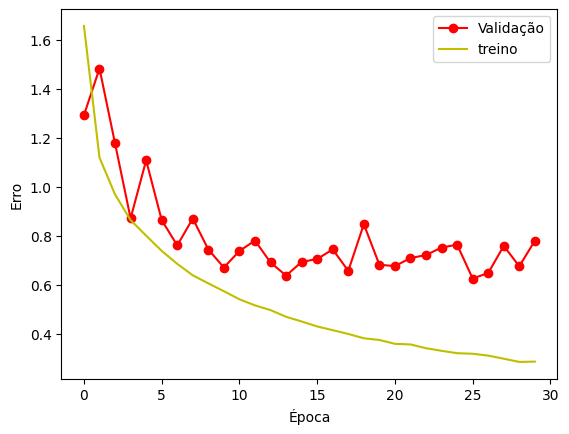

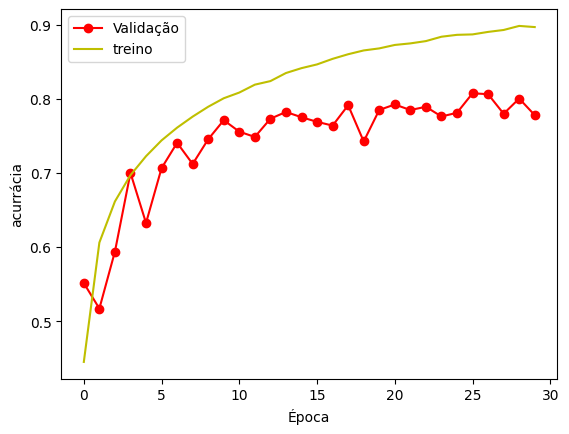

In [ ]:
plt.figure()
plt.plot(history.epoch, history.history['val_loss'], "o-r",label='Validação')
plt.plot(history.history['loss'], "-y",label='treino')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend()

plt.figure()
plt.plot(history.epoch, history.history['val_accuracy'], "o-r",label='Validação')
plt.plot(history.history['accuracy'], "-y",label='treino')
plt.xlabel('Época')
plt.ylabel('acurrácia')
plt.legend()

In [ ]:
score = model.evaluate(X_test_normalized, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8067485690116882
Test accuracy: 0.7680000066757202


In [ ]:
y_teste_hat = model.predict(X_test_normalized)
y_pred = np.argmax(y_teste_hat, axis=1)
y_true = np.argmax(y_test, axis=1)

print(y_pred.shape, y_true.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000,) (10000,)


<Axes: >

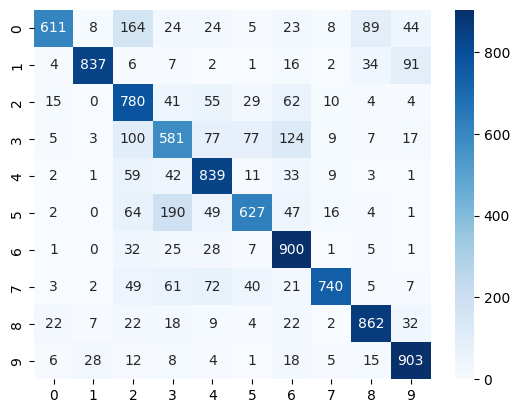

In [ ]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt= ".0f", cmap='Blues')